<a href="https://colab.research.google.com/github/Sahil-717/MAAC/blob/master/PIG_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

## Import Data
For Importing Data 3 methods can be considered.


1.   The current directory: To put the data file in the current directory and using the command: data=pd.read('data.csv')
(for importing data to colab google drive: should copy the file in the directory to the left sidebar files)


In [108]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content



2.   Using the path
data = pd.read_csv('/path/to/your/file/data.csv')  

In [109]:
data = pd.read_csv('Pipline3_I.csv', delimiter = ",")
data.head()

,N,Joint Number,Distance,FeaturDescription,WT,Depth,Length,Width,Orientation
0,1,1490,1646.439,Metal Loss Corrosion Circumferential Grooving,12.7,33,29,196,5:36
1,2,1600,1767.843,Metal Loss Corrosion General,12.7,46,40,90,4:32
2,3,1600,1779.479,Metal Loss Corrosion General,12.7,40,40,140,7:30
3,4,1610,1779.900,Metal Loss Corrosion Circumferential Grooving,12.7,30,37,512,5:02
4,5,1630,1815.281,Metal Loss Corrosion Circumferential Grooving,12.7,32,28,65,3:40


In [110]:
data.shape

(23, 9)

In [111]:
cdf = data[['Depth' , 'Length', 'Width', 'Orientation', 'FeaturDescription']]
cdf.head()

,Depth,Length,Width,Orientation,FeaturDescription
0,33,29,196,5:36,Metal Loss Corrosion Circumferential Grooving
1,46,40,90,4:32,Metal Loss Corrosion General
2,40,40,140,7:30,Metal Loss Corrosion General
3,30,37,512,5:02,Metal Loss Corrosion Circumferential Grooving
4,32,28,65,3:40,Metal Loss Corrosion Circumferential Grooving


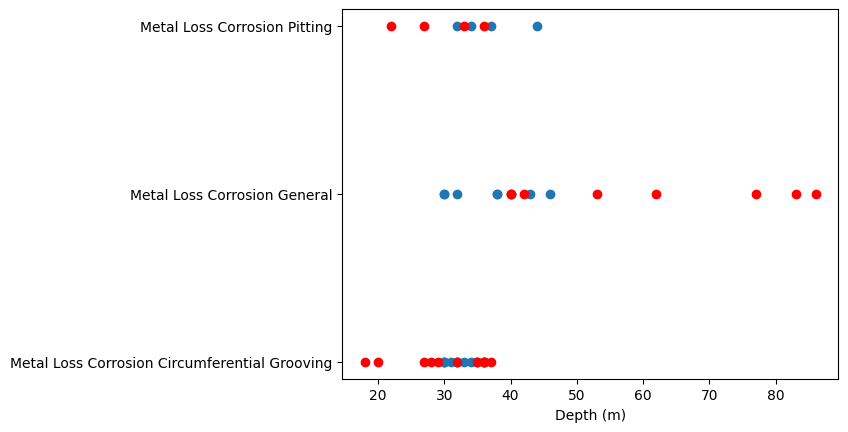

In [112]:
plt.scatter(cdf.Depth, cdf.FeaturDescription )
plt.scatter(cdf.Length, cdf.FeaturDescription, color='red')
plt.xlabel('Depth (m)')
plt.show()

Pre-processing the Data

Removing the column containing the target name since it doesn't contain numeric values.

In [113]:
X = cdf.values
X

array([[33, 29, 196, '5:36',
        'Metal Loss Corrosion Circumferential Grooving'],
       [46, 40, 90, '4:32', 'Metal Loss Corrosion General'],
       [40, 40, 140, '7:30', 'Metal Loss Corrosion General'],
       [30, 37, 512, '5:02',
        'Metal Loss Corrosion Circumferential Grooving'],
       [32, 28, 65, '3:40',
        'Metal Loss Corrosion Circumferential Grooving'],
       [30, 27, 65, '8:10',
        'Metal Loss Corrosion Circumferential Grooving'],
       [34, 20, 60, '5:32',
        'Metal Loss Corrosion Circumferential Grooving'],
       [31, 36, 251, '6:38',
        'Metal Loss Corrosion Circumferential Grooving'],
       [32, 35, 320, '4:54',
        'Metal Loss Corrosion Circumferential Grooving'],
       [37, 27, 50, '7:54', 'Metal Loss Corrosion Pitting'],
       [30, 53, 306, '7:20', 'Metal Loss Corrosion General'],
       [38, 86, 633, '3:36', 'Metal Loss Corrosion General'],
       [38, 77, 442, '5:56', 'Metal Loss Corrosion General'],
       [35, 32, 211, '4:

In [114]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le_FD = LabelEncoder()
le_FD.fit(cdf[['FeaturDescription']])
#le_FD.fit(['Metal Loss Corrosion Circumferential Grooving' , 'Metal Loss Corrosion General', 'Metal Loss Corrosion Pitting'])
X[:,4] = le_FD.transform(X[:,4])
#cdf[['FeaturDescription']] = le_FD.transform(cdf[['FeaturDescription']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
# The target value
Y = X[:,4]
Y[0:5]

array([0, 1, 1, 0, 0], dtype=object)

Train and Test Data

In [126]:
msk = np.random.rand(len(X))<0.8
train = cdf [msk]
test = cdf [~msk]

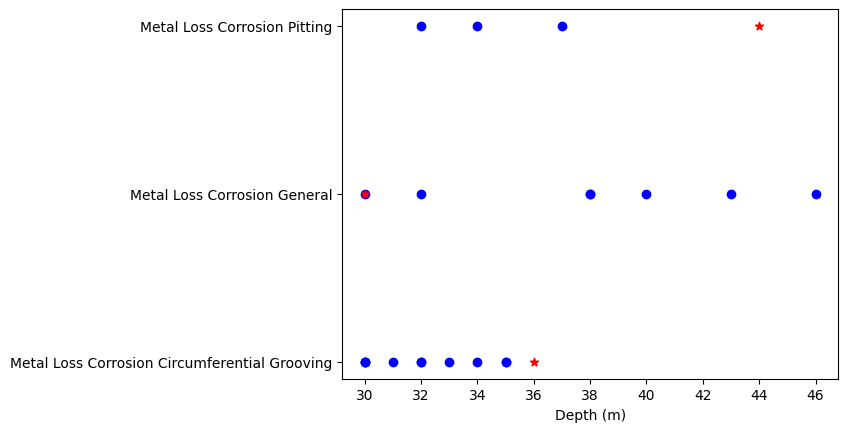

In [127]:
plt.scatter(train.Depth, train.FeaturDescription, color = 'blue')
plt.scatter(test.Depth, test.FeaturDescription, color = 'red', marker = "*")
plt.xlabel('Depth (m)')
plt.show()

In [128]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['Depth']])
train_y = np.asanyarray(train[['FeaturDescription']])

test_x = np.asanyarray(test[['Depth']])
test_y = np.asanyarray([['FeaturDescription']])

In [119]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 4.600e+01, 2.116e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 3.700e+01, 1.369e+03],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 4.300e+01, 1.849e+03],
       [1.000e+00, 4.400e+01, 1.936e+03],
       [1.000e+00, 3.400e+01, 1.156e+03]])

Pre-processing the Data
Removing the column containing the target name since it doesn't contain numeric values.



In [120]:
X =

SyntaxError: invalid syntax (<ipython-input-120-0938eb09f843>, line 1)

In [ ]:
from sklrean import preprocessing


In [ ]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)